<a href="https://colab.research.google.com/github/AshmithaMB/Course_Review_Sentiment_Analysis/blob/main/Course_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
data = pd.read_csv('/content/learner_reviews.csv')

In [37]:
data

,learner_reviews
0,The Machine Learning Program with Internship w...
1,Full Stack Data Analytics Program with Interns...
2,Full Stack Data Science Program with Internshi...
3,Full Stack AI Program with Internship was a tr...
4,"Advanced Deep Learning, NLP, NLU, Transformers..."
...,...
233,MySQL Program with Internship gave me the conf...
234,AWS Engineer Program with Internship is a must...
235,DevOps Program with Internship is a well-struc...
236,Azure Program with Internship is a comprehensi...


In [38]:
data.shape

(238, 1)

In [39]:
course_pattern = r'(' + '|'.join([
    "Machine Learning Program with Internship",
    "Full Stack Data Analytics Program with Internship",
    "Full Stack Data Science Program with Internship",
    "Full Stack AI Program with Internship",
    "Advanced Deep Learning, NLP, NLU, Transformers Program with Internship",
    "Power BI Program with Internship",
    "Tableau Program with Internship",
    "Python Developer Program with Internship",
    "Free Job-Ready Career Consultation",
    "Excel for Data Analysis with Internship",
    "MySQL Program with Internship",
    "AWS Engineer Program with Internship",
    "DevOps Program with Internship",
    "Azure Program with Internship",
    "Snowflake Career Transition Program with AWS, Kafka, Airflow"
]) + ')'

data['course_name'] = data['learner_reviews'].str.extract(course_pattern)


In [40]:
data

,learner_reviews,course_name
0,The Machine Learning Program with Internship w...,Machine Learning Program with Internship
1,Full Stack Data Analytics Program with Interns...,Full Stack Data Analytics Program with Internship
2,Full Stack Data Science Program with Internshi...,Full Stack Data Science Program with Internship
3,Full Stack AI Program with Internship was a tr...,Full Stack AI Program with Internship
4,"Advanced Deep Learning, NLP, NLU, Transformers...","Advanced Deep Learning, NLP, NLU, Transformers..."
...,...,...
233,MySQL Program with Internship gave me the conf...,MySQL Program with Internship
234,AWS Engineer Program with Internship is a must...,AWS Engineer Program with Internship
235,DevOps Program with Internship is a well-struc...,DevOps Program with Internship
236,Azure Program with Internship is a comprehensi...,Azure Program with Internship


In [41]:
def preprocess(text):
    if pd.isnull(text):
        return ''

    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stopword = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    cleaned_text = [ word for word in tokens if word not in stopword ]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(w, pos = 'a') for w in cleaned_text]
    return ' '.join(lemmatized_tokens)

In [42]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [43]:
analyzer = SentimentIntensityAnalyzer()

In [44]:
def analyse_score(score):
  if score < 0.0:
    return 'Negative'
  elif score == 0.0:
    return 'Neutral'
  else :
    return 'Positive'

In [45]:
data['learner_reviews'] = data['learner_reviews'].apply(preprocess)

In [46]:
text_score = []

for value in data.learner_reviews.values:
  text_score.append(analyzer.polarity_scores(value)['compound'])

data['Text Score'] = text_score
data.head()

,learner_reviews,course_name,Text Score
0,machine learning program internship exceptiona...,Machine Learning Program with Internship,0.6908
1,full stack data analytics program internship e...,Full Stack Data Analytics Program with Internship,0.2960
2,full stack data science program internship pro...,Full Stack Data Science Program with Internship,0.2500
3,full stack ai program internship transformativ...,Full Stack AI Program with Internship,0.5994
4,advanced deep learning nlp nlu transformers pr...,"Advanced Deep Learning, NLP, NLU, Transformers...",0.5849


In [47]:
data['Text Score'] = data['Text Score'].apply(analyse_score)
data

,learner_reviews,course_name,Text Score
0,machine learning program internship exceptiona...,Machine Learning Program with Internship,Positive
1,full stack data analytics program internship e...,Full Stack Data Analytics Program with Internship,Positive
2,full stack data science program internship pro...,Full Stack Data Science Program with Internship,Positive
3,full stack ai program internship transformativ...,Full Stack AI Program with Internship,Positive
4,advanced deep learning nlp nlu transformers pr...,"Advanced Deep Learning, NLP, NLU, Transformers...",Positive
...,...,...,...
233,mysql program internship gave confidence handl...,MySQL Program with Internship,Positive
234,aws engineer program internship must aspiring ...,AWS Engineer Program with Internship,Neutral
235,devops program internship wellstructured cours...,DevOps Program with Internship,Negative
236,azure program internship comprehensive program...,Azure Program with Internship,Positive


In [48]:
score_counts = data['Text Score'].value_counts()
score_counts

Positive    168
Neutral      47
Negative     23
Name: Text Score, dtype: int64

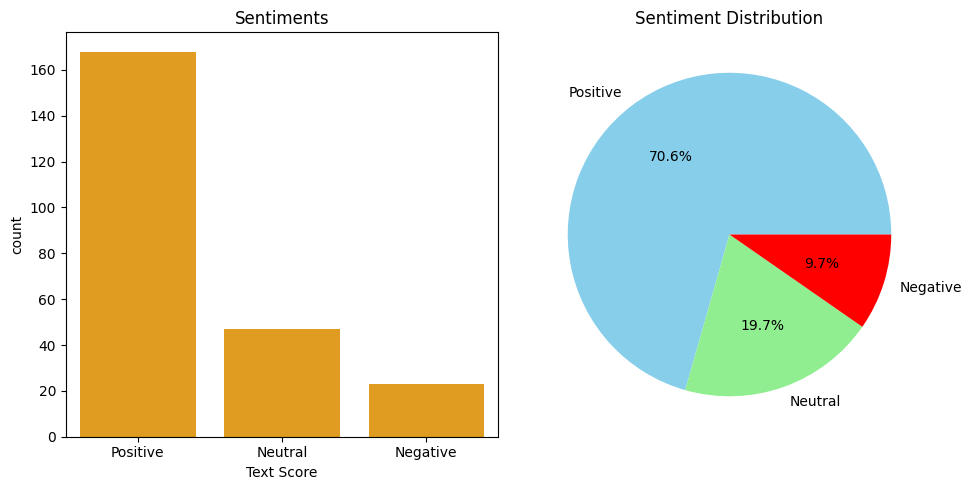

In [49]:
countplot_colors = ['orange']

plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.countplot(x='Text Score', data=data, color=countplot_colors[0])
plt.title('Sentiments')

piechart_colors = ['skyblue', 'lightgreen',  'red']
plt.subplot(122)
plt.pie(score_counts, labels=score_counts.index, colors=piechart_colors, autopct='%1.1f%%')
plt.title('Sentiment Distribution')

plt.tight_layout();

In [50]:
data.isnull().sum()

learner_reviews     0
course_name        20
Text Score          0
dtype: int64

In [51]:
null_values = data[data['course_name'].isnull()].head(20)
null_values

,learner_reviews,course_name,Text Score
10,webinar bepec open conference 30th june useful...,NaN,Positive
22,webinar bepec open conference 30th june underw...,NaN,Neutral
38,webinar bepec open conference 30th june inform...,NaN,Positive
50,webinar bepec open conference 30th june inform...,NaN,Neutral
64,webinar bepec open conference 30th june inform...,NaN,Neutral
72,interview preparation – dadsaiml course okay p...,NaN,Positive
73,affordable data scienceaz course covered basic...,NaN,Positive
74,full stack data science career transition prog...,NaN,Neutral
93,interview preparation – dadsaiml course decent...,NaN,Neutral
94,affordable data scienceaz course good hoped ad...,NaN,Positive


In [52]:
data.loc[data['learner_reviews'].str.contains('webinar bepec open conference', case=False, na=False), 'course_name'] = 'Webinars'

data.loc[data['learner_reviews'].str.contains('interview preparation – dadsaiml', case=False, na=False), 'course_name'] = 'Full Stack Data Science Program with Internship'

data.loc[data['learner_reviews'].str.contains('affordable data scienceaz', case=False, na=False), 'course_name'] = 'Full Stack Data Science Program with Internship'

data.loc[data['learner_reviews'].str.contains('full stack data science career transition program', case=False, na=False), 'course_name'] = 'Full Stack Data Science Program with Internship'


In [53]:
course_reviews_counts = data.groupby(['course_name', 'Text Score'])['learner_reviews'].count().reset_index(name='Count')

course_reviews_pivot = course_reviews_counts.pivot(index='course_name', columns='Text Score', values='Count').reset_index()

course_reviews_pivot.fillna(0, inplace=True)

In [54]:
course_reviews_pivot

Text Score,course_name,Negative,Neutral,Positive
0,AWS Engineer Program with Internship,1.0,6.0,6.0
1,"Advanced Deep Learning, NLP, NLU, Transformers...",1.0,0.0,14.0
2,Azure Program with Internship,1.0,3.0,8.0
3,DevOps Program with Internship,3.0,2.0,8.0
4,Excel for Data Analysis with Internship,1.0,0.0,15.0
5,Free Job-Ready Career Consultation,0.0,0.0,12.0
6,Full Stack AI Program with Internship,1.0,2.0,14.0
7,Full Stack Data Analytics Program with Internship,3.0,6.0,10.0
8,Full Stack Data Science Program with Internship,2.0,5.0,15.0
9,Machine Learning Program with Internship,3.0,5.0,7.0


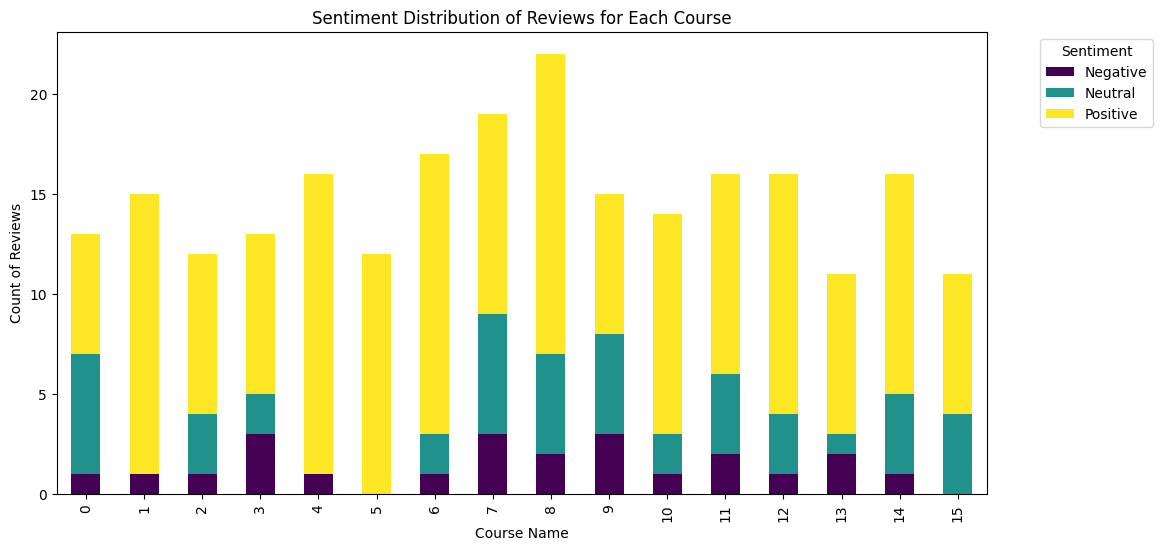

In [55]:
ax = course_reviews_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')

ax.set_xlabel('Course Name')
ax.set_ylabel('Count of Reviews')
ax.set_title('Sentiment Distribution of Reviews for Each Course')

plt.xticks(rotation=90)
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left');

In [56]:
data

,learner_reviews,course_name,Text Score
0,machine learning program internship exceptiona...,Machine Learning Program with Internship,Positive
1,full stack data analytics program internship e...,Full Stack Data Analytics Program with Internship,Positive
2,full stack data science program internship pro...,Full Stack Data Science Program with Internship,Positive
3,full stack ai program internship transformativ...,Full Stack AI Program with Internship,Positive
4,advanced deep learning nlp nlu transformers pr...,"Advanced Deep Learning, NLP, NLU, Transformers...",Positive
...,...,...,...
233,mysql program internship gave confidence handl...,MySQL Program with Internship,Positive
234,aws engineer program internship must aspiring ...,AWS Engineer Program with Internship,Neutral
235,devops program internship wellstructured cours...,DevOps Program with Internship,Negative
236,azure program internship comprehensive program...,Azure Program with Internship,Positive


In [57]:
X_train, X_test, y_train, y_test = train_test_split(data.learner_reviews,
                                                    data['Text Score'],
                                                    test_size = 0.2,
                                                    random_state = 222 )

In [58]:
%%time
pipeline = Pipeline([
    ('Tfidf Vectorizer', TfidfVectorizer()),
    ('ML Model', LinearSVC())])

model_LinearSVC111 = pipeline.fit(X_train, y_train)
predictions = model_LinearSVC111.predict(X_test)

print('ML Model - Linear SVC\n')

accuracy_LinearSVC111 = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {round(accuracy_LinearSVC111 * 100, 2)}%")

print('\nConfusion Matrix')
print(confusion_matrix(y_test, predictions))

print("\nClassification Report")
print(classification_report(y_test, predictions))

ML Model - Linear SVC

Accuracy Score: 79.17%

Confusion Matrix
[[ 0  0  3]
 [ 0  3  5]
 [ 0  2 35]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         3
     Neutral       0.60      0.38      0.46         8
    Positive       0.81      0.95      0.88        37

    accuracy                           0.79        48
   macro avg       0.47      0.44      0.45        48
weighted avg       0.73      0.79      0.75        48

CPU times: user 22.5 ms, sys: 2.69 ms, total: 25.1 ms
Wall time: 29.3 ms


#Balancing the Dataset

In [75]:
neutral_count = data[data['Text Score'] == 'Neutral'].shape[0]
negative_count = data[data['Text Score'] == 'Negative'].shape[0]
diff = neutral_count - negative_count

In [82]:
if diff > 0:
    negative_samples = data[data['Text Score'] == 'Negative']
    replicate_indices = list(range(negative_count)) * (diff // negative_count) + list(range(diff % negative_count))
    replicated_samples = negative_samples.iloc[replicate_indices]
    df_oversampled = pd.concat([data, replicated_samples], ignore_index=True)

else:
    df_oversampled = data

df_oversampled

,learner_reviews,course_name,Text Score
0,machine learning program internship exceptiona...,Machine Learning Program with Internship,Positive
1,full stack data analytics program internship e...,Full Stack Data Analytics Program with Internship,Positive
2,full stack data science program internship pro...,Full Stack Data Science Program with Internship,Positive
3,full stack ai program internship transformativ...,Full Stack AI Program with Internship,Positive
4,advanced deep learning nlp nlu transformers pr...,"Advanced Deep Learning, NLP, NLU, Transformers...",Positive
...,...,...,...
257,machine learning program internship disappoint...,Machine Learning Program with Internship,Negative
258,tableau program internship regrettable choice ...,Tableau Program with Internship,Negative
259,aws engineer program internship disappointing ...,AWS Engineer Program with Internship,Negative
260,devops program internship wellstructured cours...,DevOps Program with Internship,Negative


In [107]:
df_shuffled = df_oversampled.sample(frac=1, random_state=42)

positive_reviews = df_shuffled[df_shuffled['Text Score'] == 'Positive']
selected_positive_reviews = positive_reviews.sample(n=70, random_state=42)

neutral_and_negative_reviews = df_shuffled[df_shuffled['Text Score'] != 'Positive']

In [108]:
neutral_and_negative_reviews = df_shuffled[df_shuffled['Text Score'] != 'Positive']
df_balanced = pd.concat([selected_positive_reviews, neutral_and_negative_reviews], ignore_index=True)
df_balanced

,learner_reviews,course_name,Text Score
0,tableau program internship decent content coul...,Tableau Program with Internship,Positive
1,python developer program internship informativ...,Python Developer Program with Internship,Positive
2,machine learning program internship fell short...,Machine Learning Program with Internship,Positive
3,mysql program internship gave confidence handl...,MySQL Program with Internship,Positive
4,snowflake career transition program aws kafka ...,"Snowflake Career Transition Program with AWS, ...",Positive
...,...,...,...
159,full stack data science career transition prog...,Full Stack Data Science Program with Internship,Neutral
160,tableau program internship regrettable choice ...,Tableau Program with Internship,Negative
161,regret enrolling machine learning program inte...,Machine Learning Program with Internship,Negative
162,full stack data science program internship dis...,Full Stack Data Science Program with Internship,Negative


In [135]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [109]:
X_train, X_test, y_train, y_test = train_test_split(df_balanced.learner_reviews,
                                                    df_balanced['Text Score'],
                                                    test_size = 0.2,
                                                    random_state = 222 )

In [132]:
%%time
pipeline_ExtraTrees = Pipeline([
    ('CountVectorizer', CountVectorizer()),
    ('Tfidf Vectorizer', TfidfTransformer()),
    ('ML Model', ExtraTreesClassifier())
])

model_ExtraTrees = pipeline_ExtraTrees.fit(X_train, y_train)
predictions_ExtraTrees = model_ExtraTrees.predict(X_test)

accuracy_ExtraTrees = accuracy_score(y_test, predictions_ExtraTrees)
print(f"Extra Trees - Accuracy Score: {round(accuracy_ExtraTrees * 100, 2)}%")

print('\nConfusion Matrix')
print(confusion_matrix(y_test, predictions_ExtraTrees))

print("\nClassification Report")
print(classification_report(y_test, predictions_ExtraTrees))

Extra Trees - Accuracy Score: 87.88%

Confusion Matrix
[[10  0  0]
 [ 0  9  1]
 [ 0  3 10]]

Classification Report
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00        10
     Neutral       0.75      0.90      0.82        10
    Positive       0.91      0.77      0.83        13

    accuracy                           0.88        33
   macro avg       0.89      0.89      0.88        33
weighted avg       0.89      0.88      0.88        33



In [113]:
%%time
pipeline = Pipeline([
    ('Tfidf Vectorizer', TfidfVectorizer()),
    ('ML Model', LinearSVC())])

model_LinearSVC111 = pipeline.fit(X_train, y_train)
predictions = model_LinearSVC111.predict(X_test)

print('ML Model - Linear SVC\n')

accuracy_LinearSVC111 = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {round(accuracy_LinearSVC111 * 100, 2)}%")

print('\nConfusion Matrix')
print(confusion_matrix(y_test, predictions))

print("\nClassification Report")
print(classification_report(y_test, predictions))

ML Model - Linear SVC

Accuracy Score: 81.82%

Confusion Matrix
[[10  0  0]
 [ 1  8  1]
 [ 1  3  9]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.83      1.00      0.91        10
     Neutral       0.73      0.80      0.76        10
    Positive       0.90      0.69      0.78        13

    accuracy                           0.82        33
   macro avg       0.82      0.83      0.82        33
weighted avg       0.83      0.82      0.81        33

CPU times: user 29.8 ms, sys: 724 µs, total: 30.5 ms
Wall time: 31.1 ms


In [117]:
%%time
pipeline = Pipeline([
    ('CountVectorizer', CountVectorizer()),
    ('Tfidf Vectorizer', TfidfTransformer()),
    ('ML Model', LogisticRegression())])

model_LogR1 = pipeline.fit(X_train, y_train)
predictions = model_LogR1.predict(X_test)

accuracy_LogR1 = accuracy_score(y_test, predictions)
print(f"Accuracy Score: {round(accuracy_LogR1 * 100, 2)}%")

print('\nConfusion Matrix')
print(confusion_matrix(y_test, predictions))

print("\nClassification Report")
print(classification_report(y_test, predictions))

Accuracy Score: 75.76%

Confusion Matrix
[[ 8  0  2]
 [ 1  6  3]
 [ 0  2 11]]

Classification Report
              precision    recall  f1-score   support

    Negative       0.89      0.80      0.84        10
     Neutral       0.75      0.60      0.67        10
    Positive       0.69      0.85      0.76        13

    accuracy                           0.76        33
   macro avg       0.78      0.75      0.76        33
weighted avg       0.77      0.76      0.76        33

CPU times: user 40.3 ms, sys: 1.39 ms, total: 41.7 ms
Wall time: 47.2 ms


In [144]:
import pickle
with open('extratrees_model.pkl', 'wb') as f:
    pickle.dump(model_ExtraTrees, f)

## Testing the Model

In [149]:
sent1 = ['The Full Stack Data Science Program with Internship was disappointing. The course lacked practical applications, and the internship did not offer valuable experience']
y_predict = model_ExtraTrees.predict(sent1)
y_predict

array(['Negative'], dtype=object)